In [ ]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('stopwords')

# 英文停用词
stop_words = set(stopwords.words('english'))

file_dir = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/5900"
all_files = auto_read_dir(file_dir)
all_files = [os.path.join(file_dir, x) for x in all_files]

number of files with prefix '' and suffix '': 31


In [36]:
def plot_layer_data(layer_data, save_path=None, caption=None):
    # 提取数据
    layer_scores, layers = [], []
    for layer_idx, layer in layer_data.items():
        if isinstance(layer, dict):
            layer_scores.append(layer['score'])
            layers.append(layer_idx)
    layer_scores = np.array(layer_scores)

    # 为每个层的四个数值分别定义一个系列
    evidence_weight = layer_scores[:, 0]
    full_context_weight = layer_scores[:, 1]
    attack_context_weight = layer_scores[:, 2]
    remaining_context_weight = layer_scores[:, 3]

    # 创建图形
    plt.figure(figsize=(10, 6))

    # 绘制每层的四个权重
    plt.plot(layers, evidence_weight, label='Evidence Context Weight', color='blue', marker='o')
    plt.plot(layers, full_context_weight, label='Full Context Weight', color='green', marker='x')
    plt.plot(layers, attack_context_weight, label='Attack Context Weight', color='red', marker='s')
    plt.plot(layers, remaining_context_weight, label='Remaining Context Weight', color='purple', marker='^')

    # 添加标题和标签
    if caption is None:
        caption = 'Model Layer Characteristics Across Different Contexts'

    plt.title(caption, fontsize=16)
    plt.xlabel('Layer Number', fontsize=12)
    plt.ylabel('Weight Value', fontsize=12)
    plt.legend()

    # 显示图形
    plt.grid(True)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# plot_layer_data(instance)

In [37]:
def count_tokens(content):
    s_lst, d_lst = [], []
    for k, v in content.items():
        if isinstance(k, int):
            if k < 16:
                s_lst.extend(v['topk_tokens'])
            else:
                d_lst.extend(v['topk_tokens'])
            s_lst = list(set(s_lst))
            d_lst = list(set(d_lst))
            # s_lst = [word for word in s_lst if word.lower() not in stop_words and word.isalpha()]
            # d_lst = [word for word in d_lst if word.lower() not in stop_words and word.isalpha()]
    return s_lst, d_lst

/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/Meta-Llama-3.1-8B-Instruct/5900 not exist! --> Create dir /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/Meta-Llama-3.1-8B-Instruct/5900
no<|eot_id|>
yes<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
yes<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>


/tmp/ipykernel_122509/648315286.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
no<|eot_id|>
yes<|eot_id|>
no<|eot_id|>


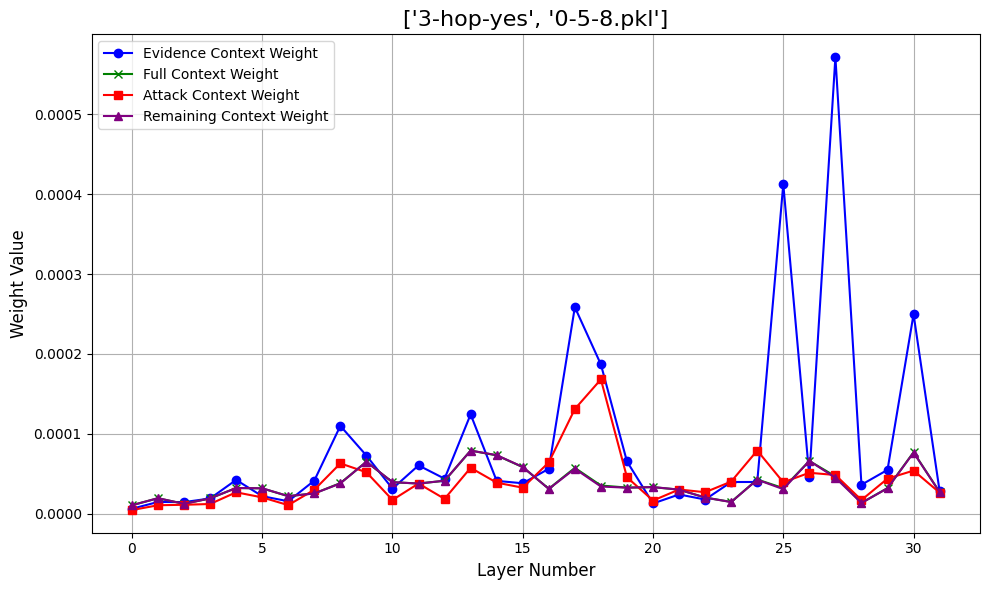

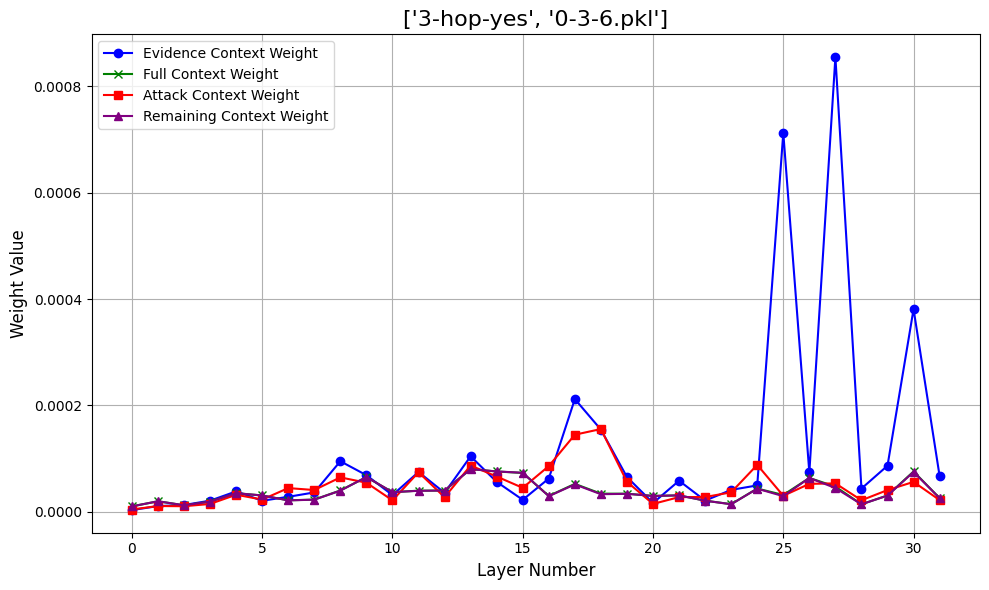

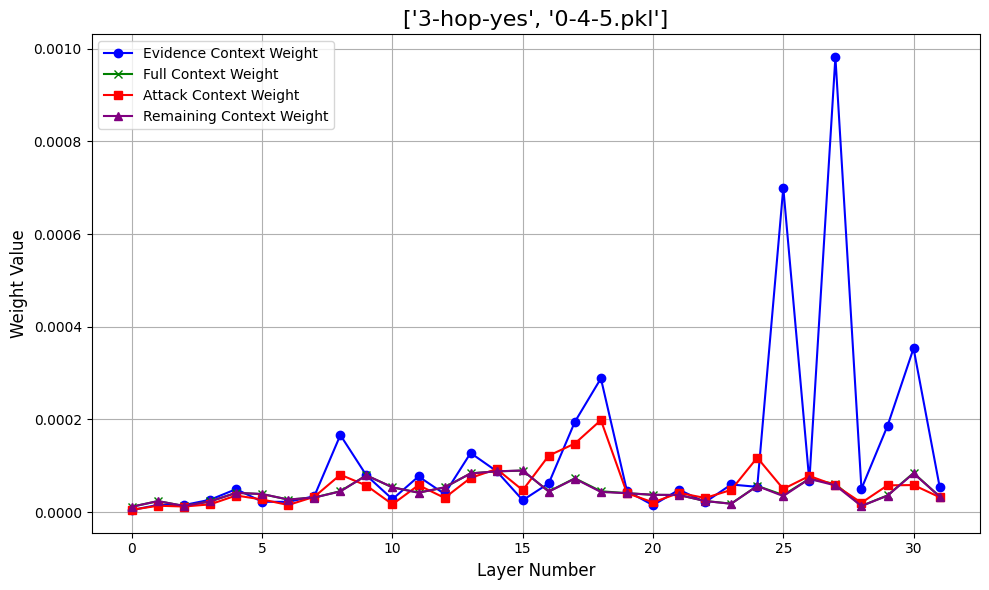

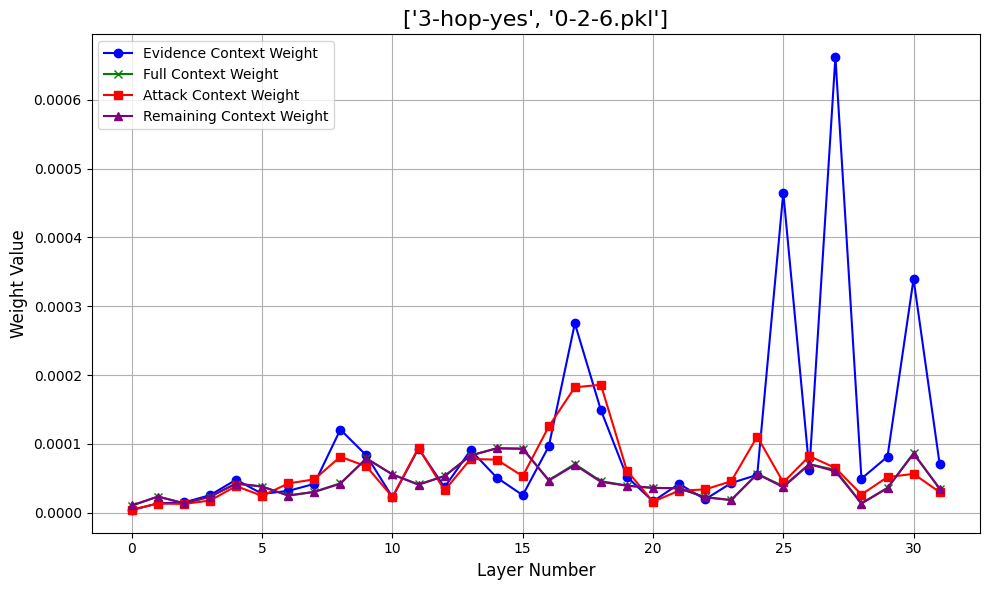

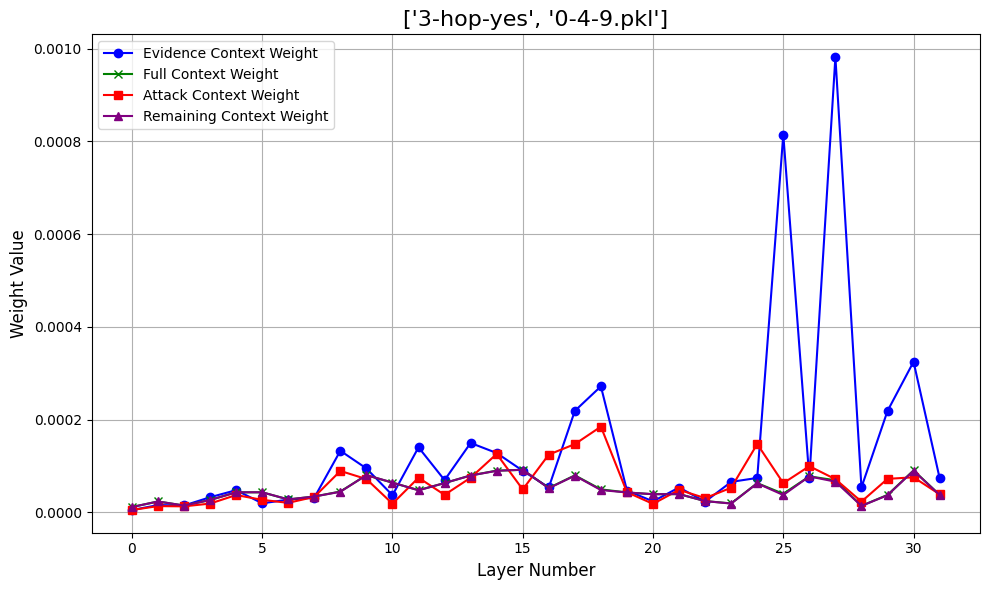

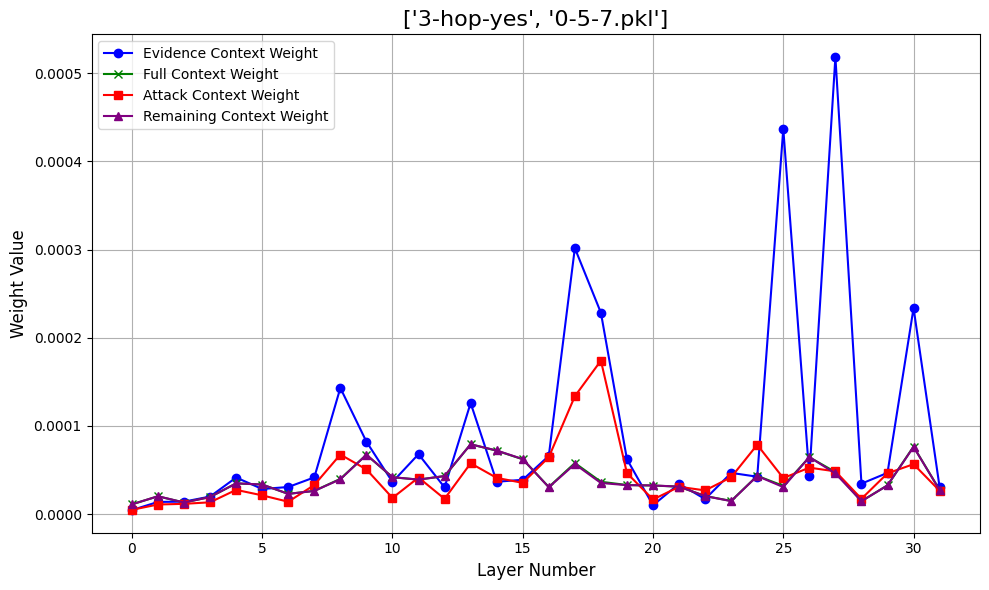

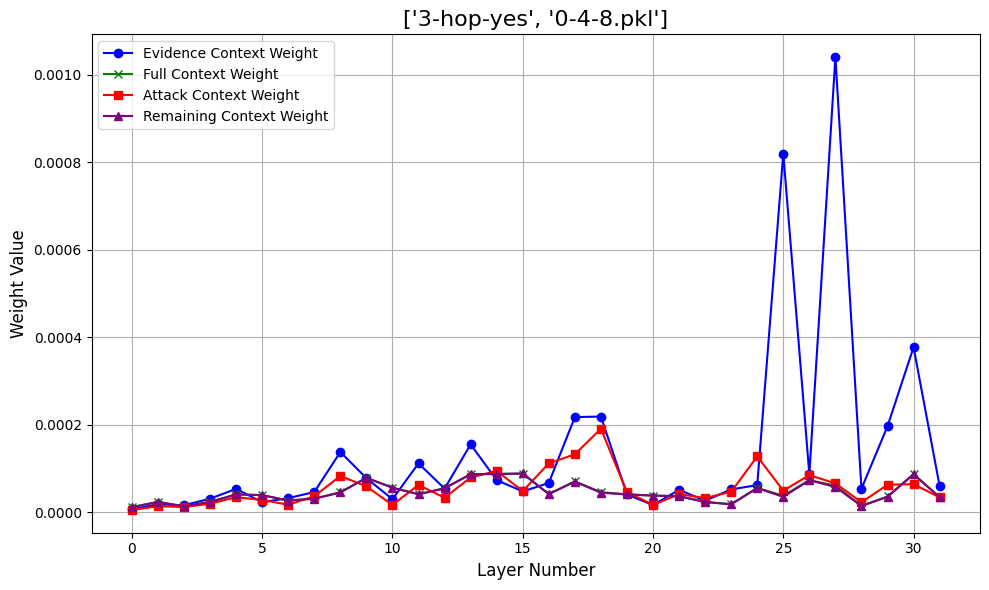

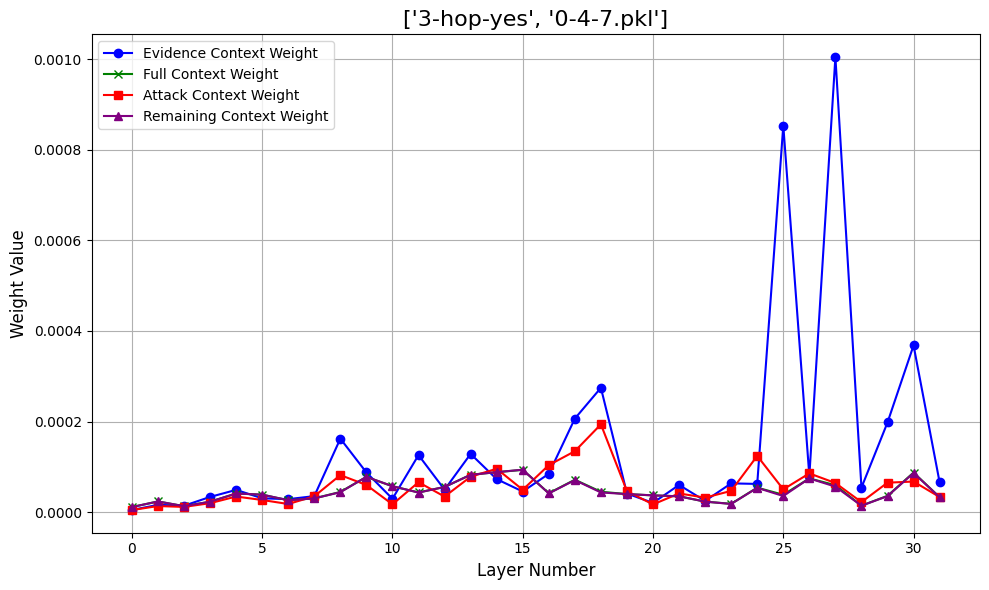

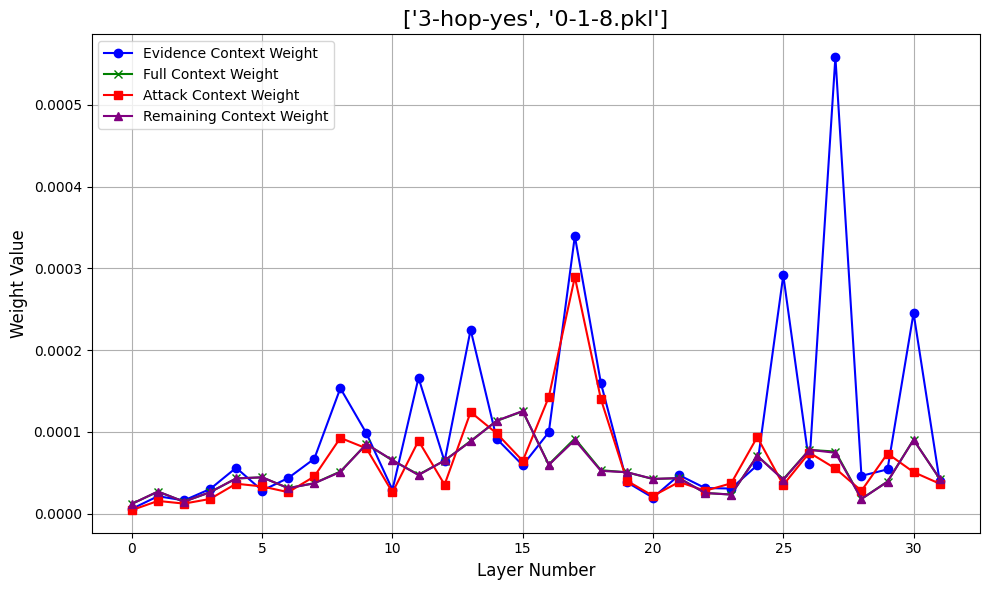

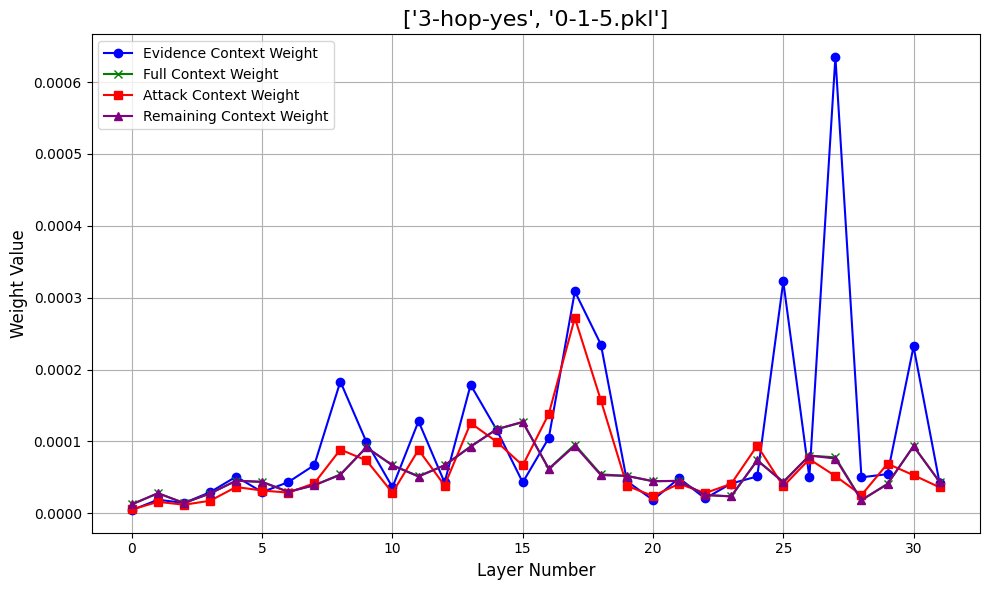

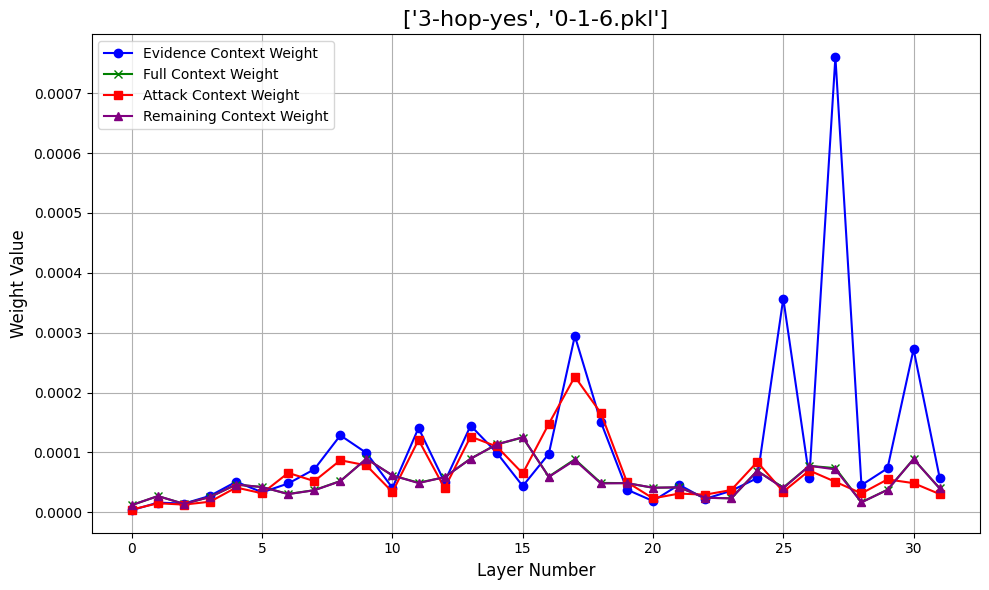

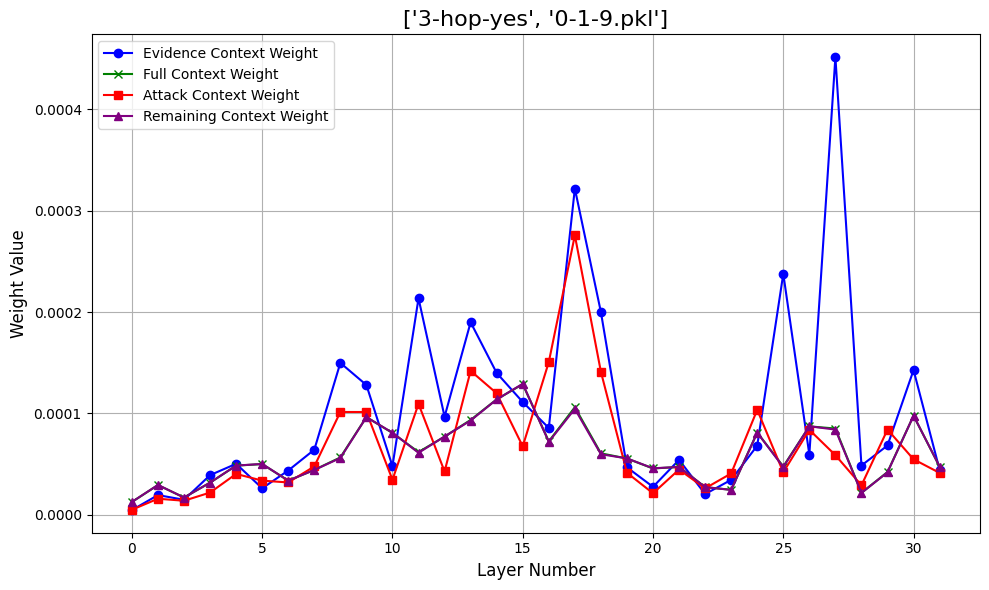

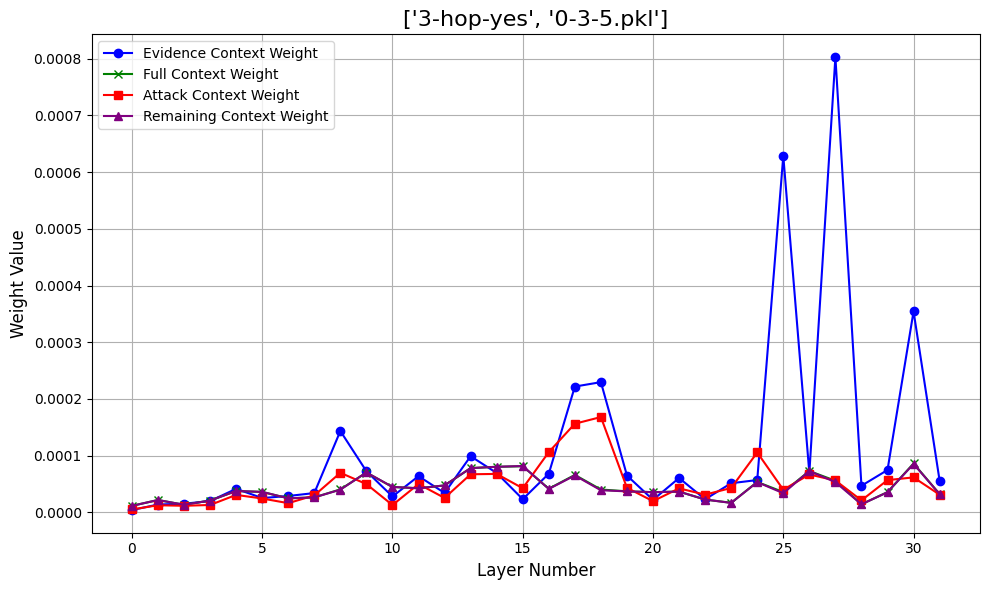

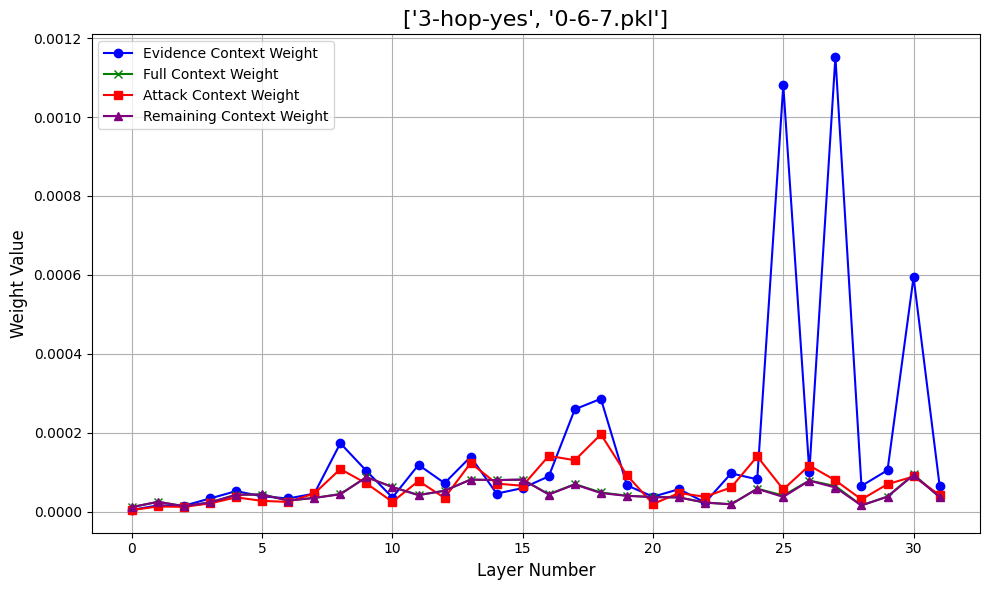

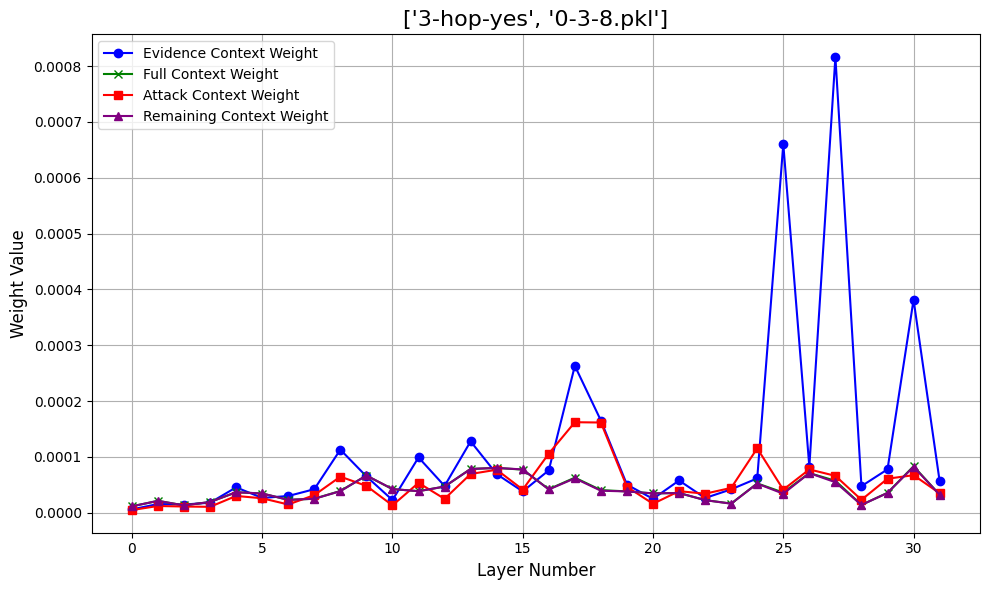

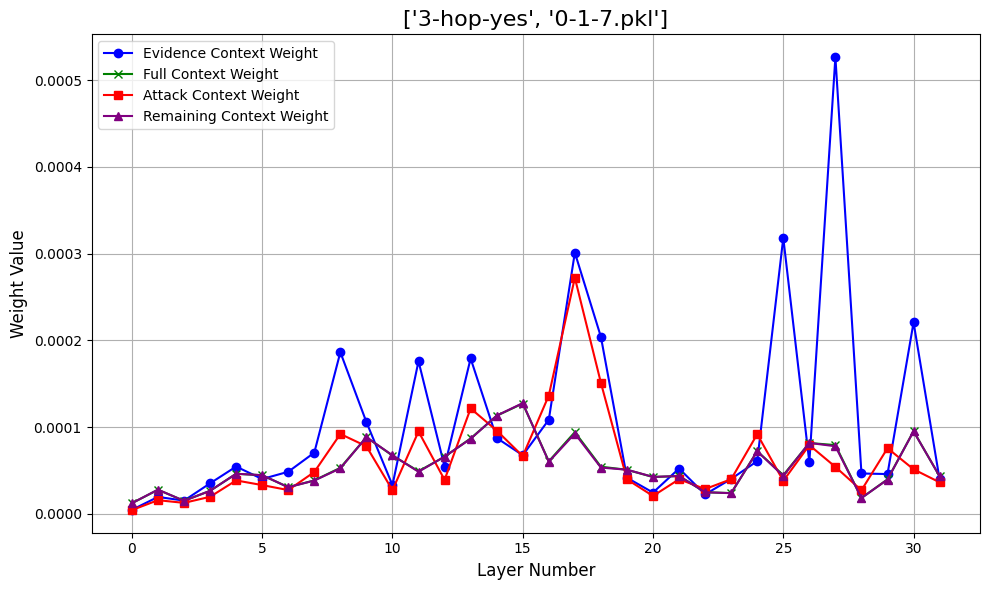

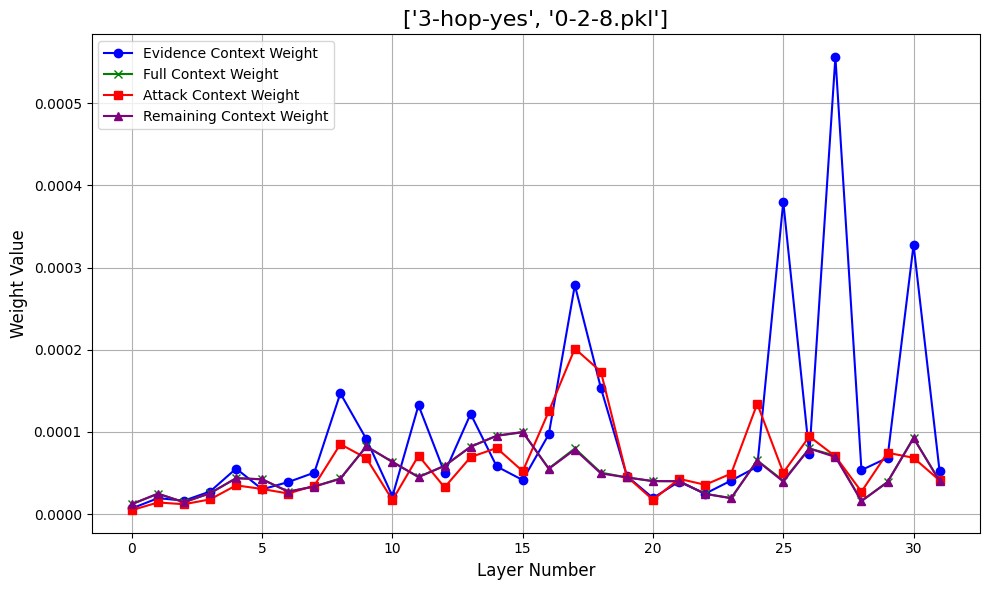

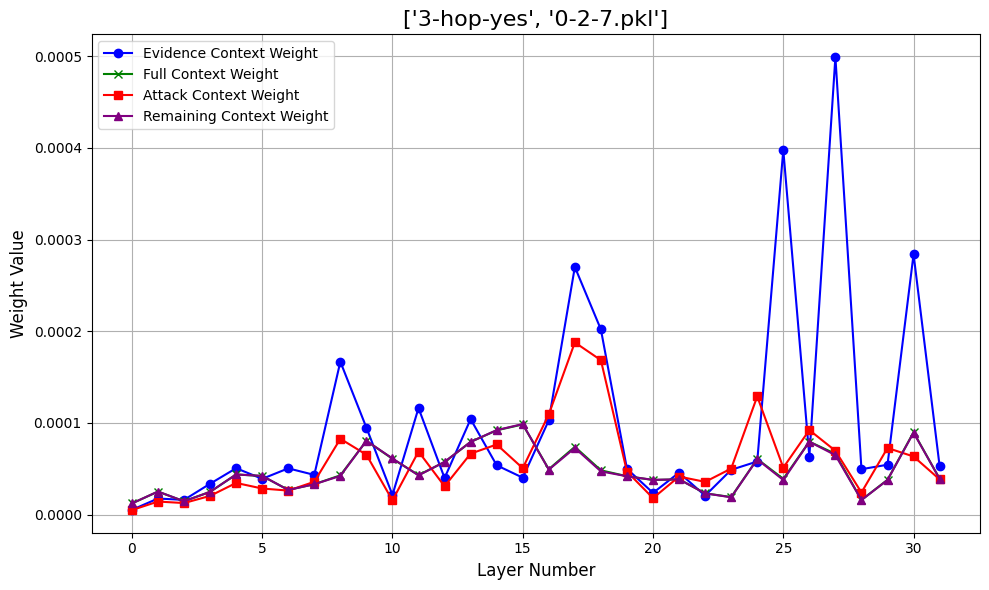

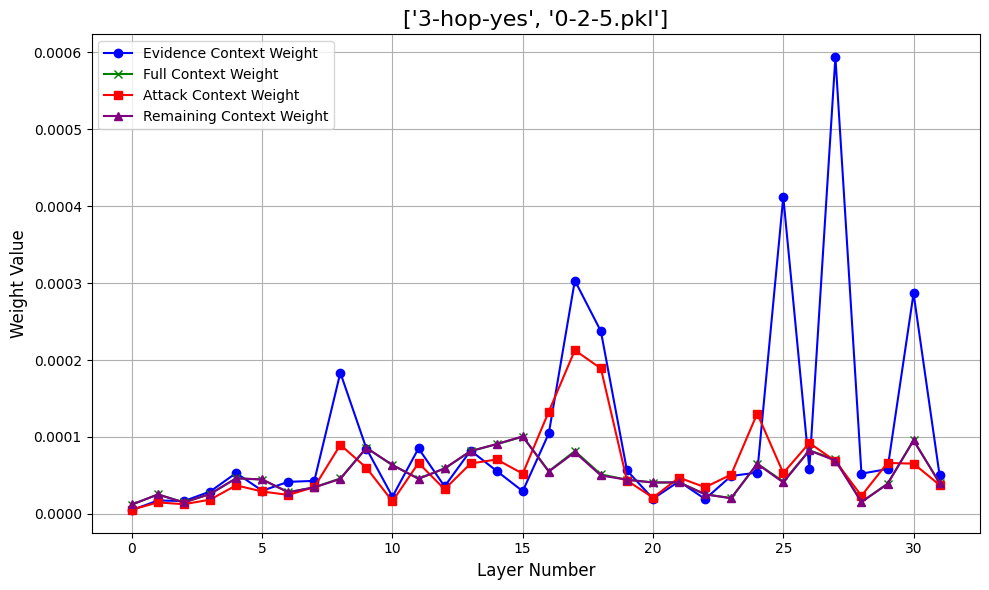

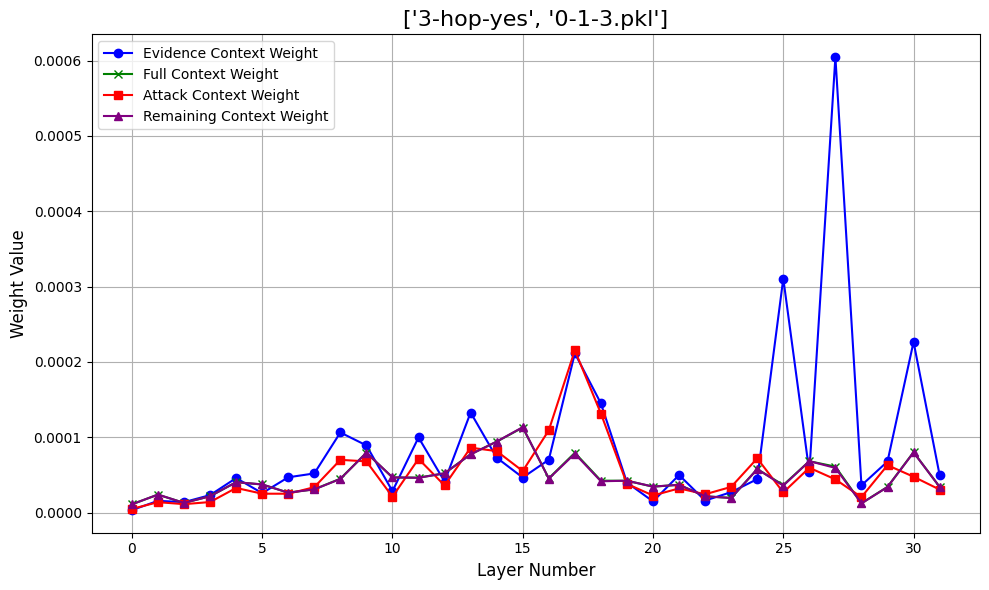

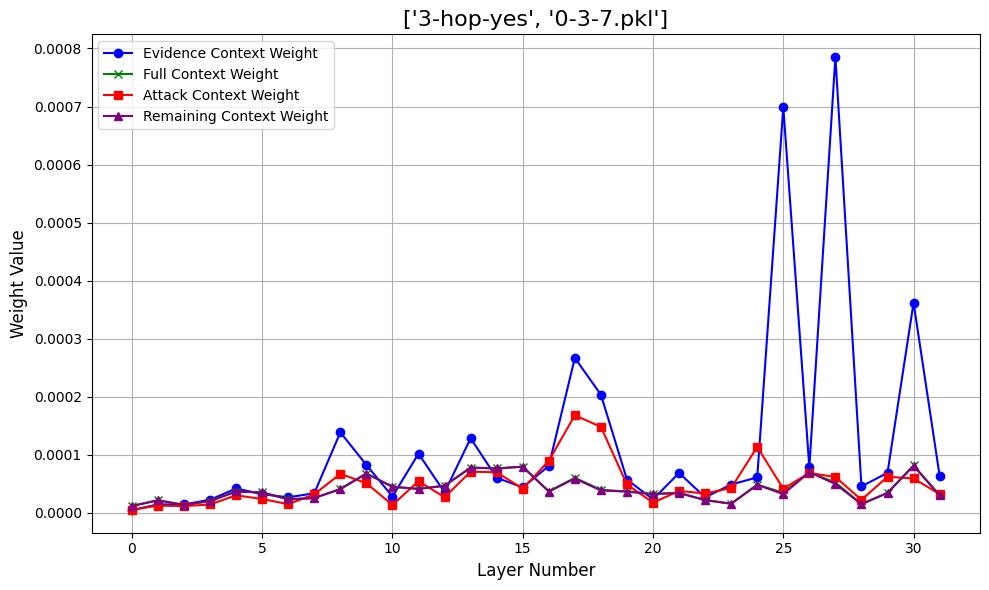

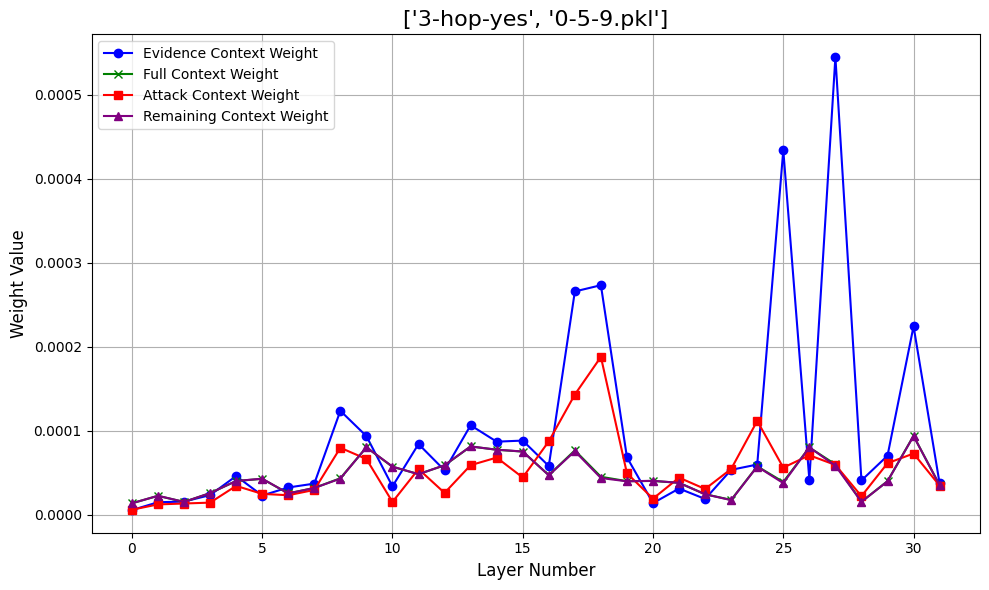

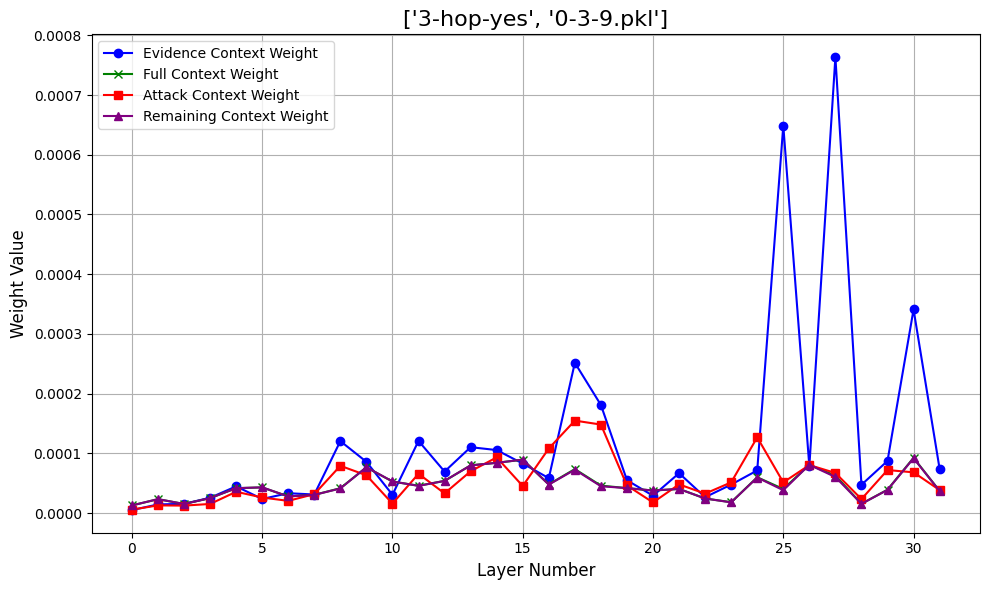

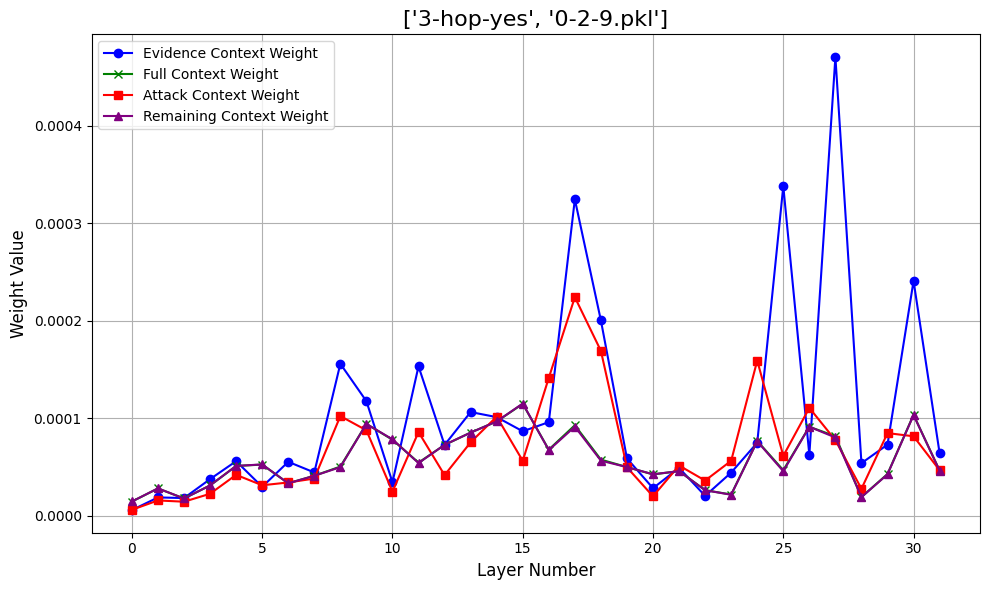

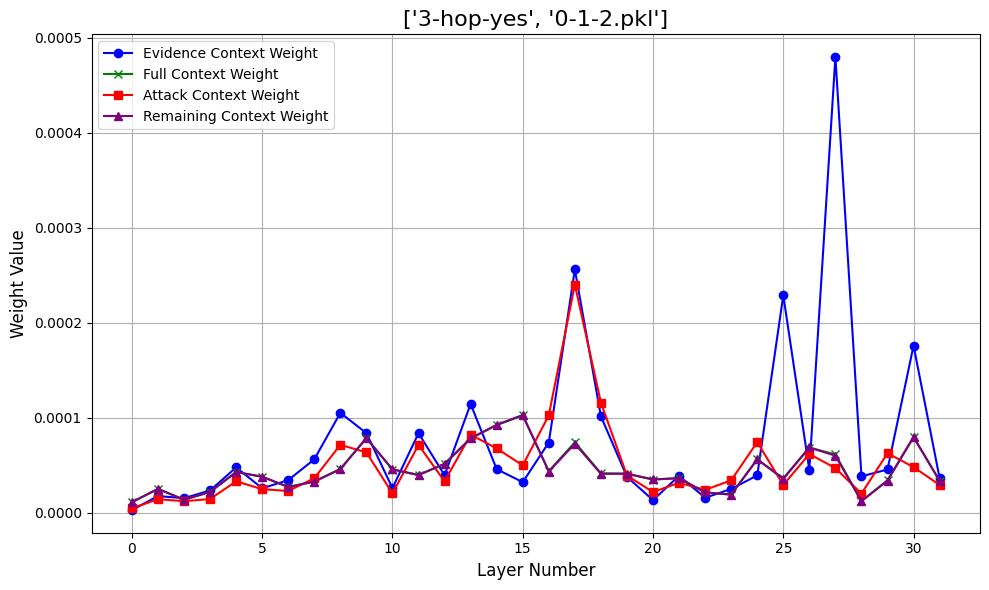

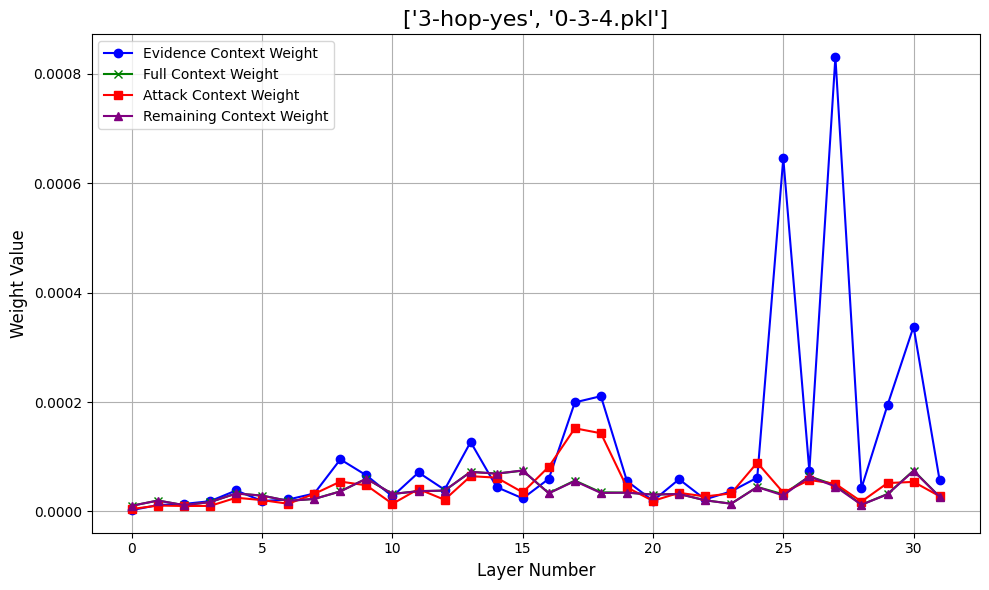

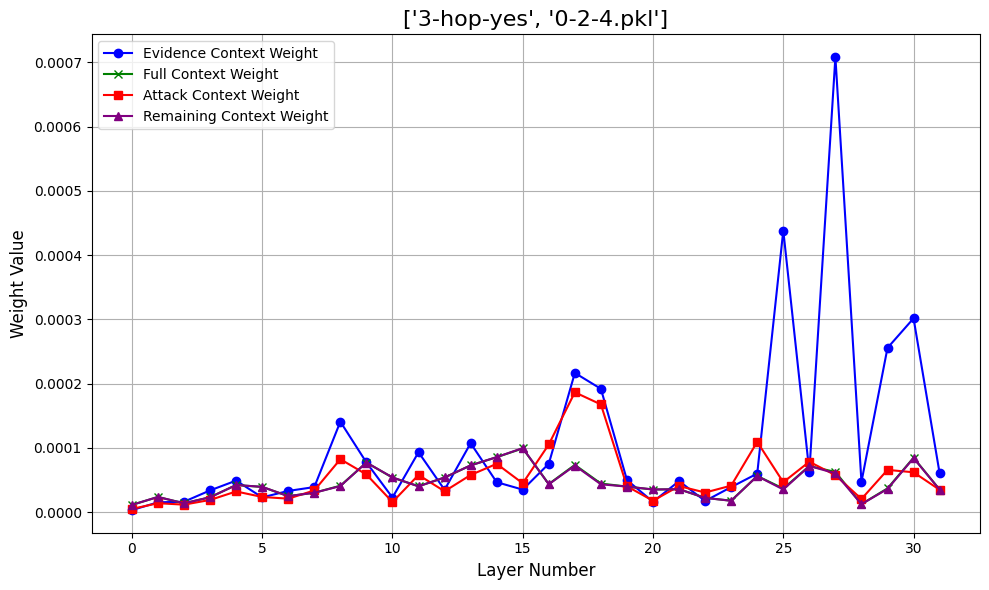

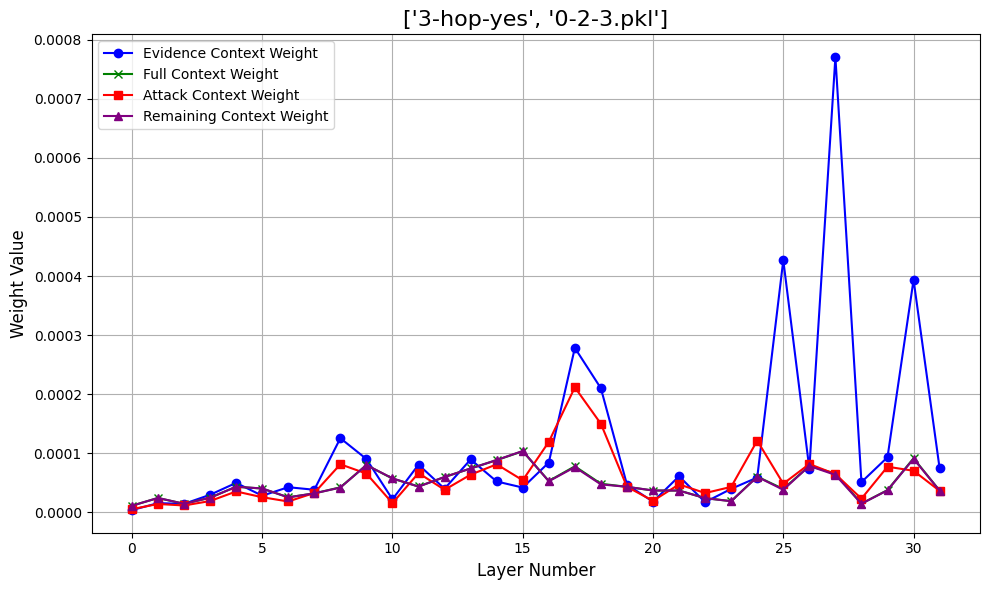

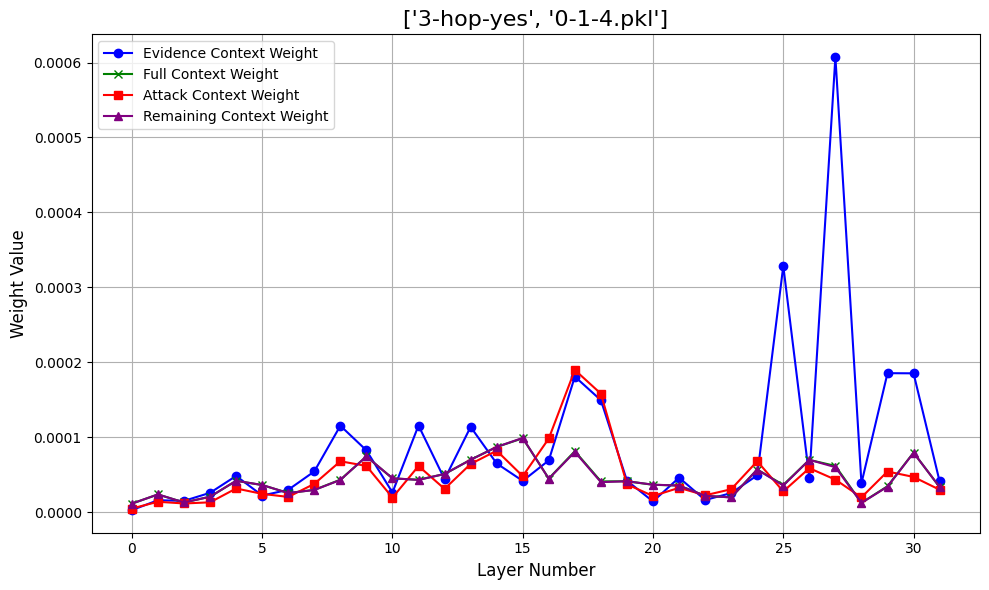

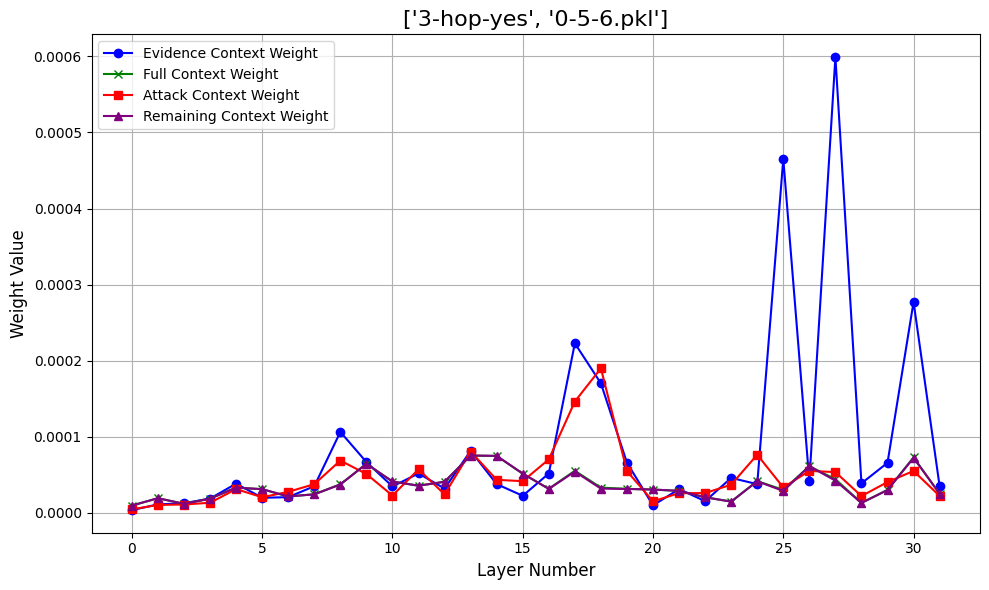

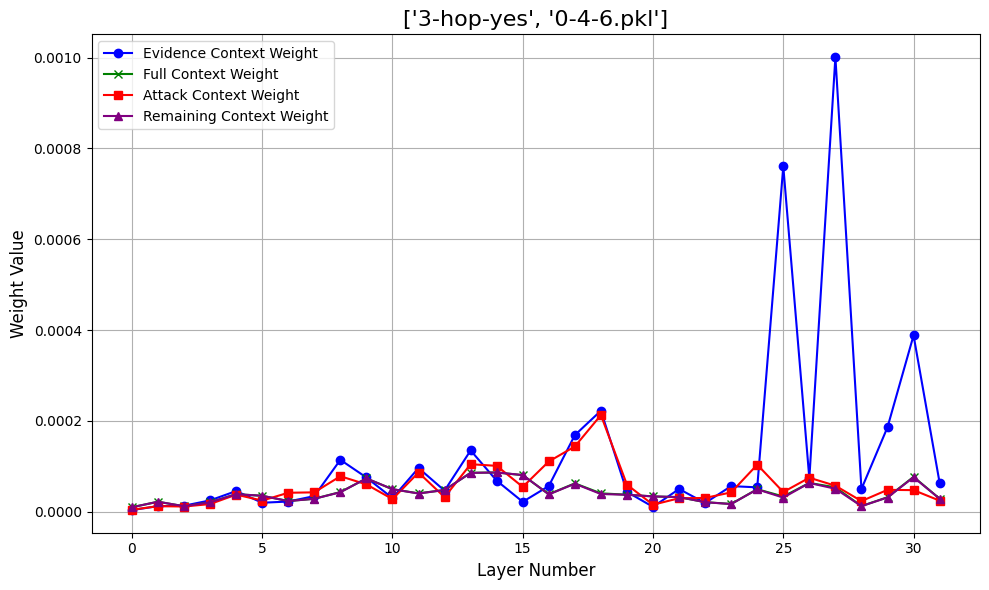

In [47]:
dir_path = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/figure/Meta-Llama-3.1-8B-Instruct/5900"
auto_mkdir(dir_path)
f_shallow_layer_topk_tokens, f_deep_layer_topk_tokens = [], []
s_shallow_layer_topk_tokens, s_deep_layer_topk_tokens = [], []
for file in all_files:
    settings = os.path.basename(file).split("_")
    hop, depth = settings[0], settings[1]
    label = hop.split("-")[-1].lower()
    content = auto_read_data(file)
    if label in content["pred_res"].lower():
        print(content["pred_res"].lower())
        save_path = os.path.join(dir_path, f"correct_{hop}_{depth}.png")
        s_lst, d_lst = count_tokens(content)
        s_shallow_layer_topk_tokens.extend(s_lst)
        s_deep_layer_topk_tokens.extend(d_lst)
        s_shallow_layer_topk_tokens = list(set(s_shallow_layer_topk_tokens))
        s_deep_layer_topk_tokens = list(set(s_deep_layer_topk_tokens))
    else:
        print(content["pred_res"].lower())
        save_path = os.path.join(dir_path, f"wrong_{hop}_{depth}.png")
        f_s_lst, f_d_lst = count_tokens(content)
        f_shallow_layer_topk_tokens.extend(f_s_lst)
        f_deep_layer_topk_tokens.extend(f_d_lst)
        f_shallow_layer_topk_tokens = list(set(f_shallow_layer_topk_tokens))
        f_deep_layer_topk_tokens = list(set(f_deep_layer_topk_tokens))
    plot_layer_data(content, save_path, settings)

In [26]:
pprint(s_shallow_layer_topk_tokens)
pprint(s_deep_layer_topk_tokens)

['assistant',
 ' information',
 ' that',
 'If',
 '<|eot_id|>',
 ' and',
 ' Do',
 ' context',
 'Where',
 ' football',
 ' bathroom',
 '202',
 ' they',
 '\n\n\n',
 '\n',
 ' return',
 'Cut',
 ' question',
 ' location',
 ' ',
 ' answer',
 '?\n',
 ' before',
 '4',
 ' write',
 '3',
 'PA',
 ',',
 '.\n\n',
 '<|begin_of_text|>',
 ' I',
 ' anything',
 ' directly',
 ' You',
 'Just',
 ' facts',
 '<|end_header_id|>',
 ' after',
 '.\n',
 'Answer',
 ' text',
 ' was',
 ':',
 '<|start_header_id|>',
 '185',
 ' else',
 'Question',
 ' the',
 '.',
 ' *\n\n',
 ' Gutenberg',
 '\n\n']
['assistant',
 '<|eot_id|>',
 ' THE',
 'illage',
 '"The',
 'Five',
 ' location',
 'sylvania',
 ' Father',
 'cap',
 '.\n\n',
 ',',
 'From',
 ' Washington',
 '<|end_header_id|>',
 ' was',
 '<|start_header_id|>',
 ' formally',
 ' Charleston',
 '.',
 ' Minneapolis',
 ' writing',
 ' not',
 ' Senator',
 ' to',
 ' from',
 ' bathroom',
 ' of',
 ' went',
 ' on',
 ' corner',
 ' double',
 ' ',
 ' Does',
 'Right',
 '<|begin_of_text|>',
 ' Br

In [28]:
pprint(f_shallow_layer_topk_tokens)
pprint(f_deep_layer_topk_tokens)

['assistant',
 'user',
 ' information',
 ' that',
 'If',
 '.J',
 '<|eot_id|>',
 ' not',
 ' Do',
 ':\n\n',
 'Where',
 ' context',
 ' football',
 ' bathroom',
 '202',
 '\n',
 '\n\n\n',
 ' return',
 ' on',
 'Cut',
 ' question',
 ' location',
 ' ',
 ' answer',
 '?\n',
 ' before',
 '4',
 ' second',
 ' write',
 '3',
 'PA',
 ',',
 '.\n\n',
 '<|begin_of_text|>',
 ' I',
 ' anything',
 ' directly',
 'Just',
 ' facts',
 '<|end_header_id|>',
 ' after',
 '.\n',
 'Answer',
 ' text',
 ' was',
 ':',
 '<|start_header_id|>',
 '185',
 ' else',
 'Question',
 ' the',
 '.',
 ' *\n\n',
 ' Gutenberg',
 '\n\n']
['assistant',
 '***',
 ' back',
 'office',
 '<|eot_id|>',
 ' upper',
 ' News',
 ' Mary',
 'Bridge',
 ' Senator',
 ' La',
 ' to',
 ' Mess',
 ' bedroom',
 ' THE',
 'Where',
 ' football',
 '"The',
 ' bathroom',
 ' That',
 ' went',
 '187',
 'mark',
 ' most',
 ' Hotel',
 ' there',
 ' Falls',
 'Den',
 ' Sandra',
 ' location',
 ' ',
 ' Minnesota',
 '?\n',
 ' Does',
 ' before',
 ' old',
 'ed',
 ' second',
 'NEW

1. 首先按照是否回答正确进行划分

In [6]:
print(os.path.basename(all_files[0]))
instance = auto_read_data(all_files[0])

print(instance.keys())
topk_tokens = instance[0]['topk_tokens']  # 0 is the layer index
print(topk_tokens)


3-hop_4-5-7.pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/analysis/information_flow/Meta-Llama-3.1-8B-Instruct/3-hop_4-5-7.pkl | file size: 9.04 KB | file type: pkl
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 'pred_res', 'score'])
[' return', ',', ' *\n\n', ' before', ' the', ' was', 'Question', ' bathroom', ' that', '.\n', ' *\n\n', '.\n\n', ':', 'Where', 'assistant', 'Answer', '.\n\n', '.\n\n', '?\n', '<|begin_of_text|>']


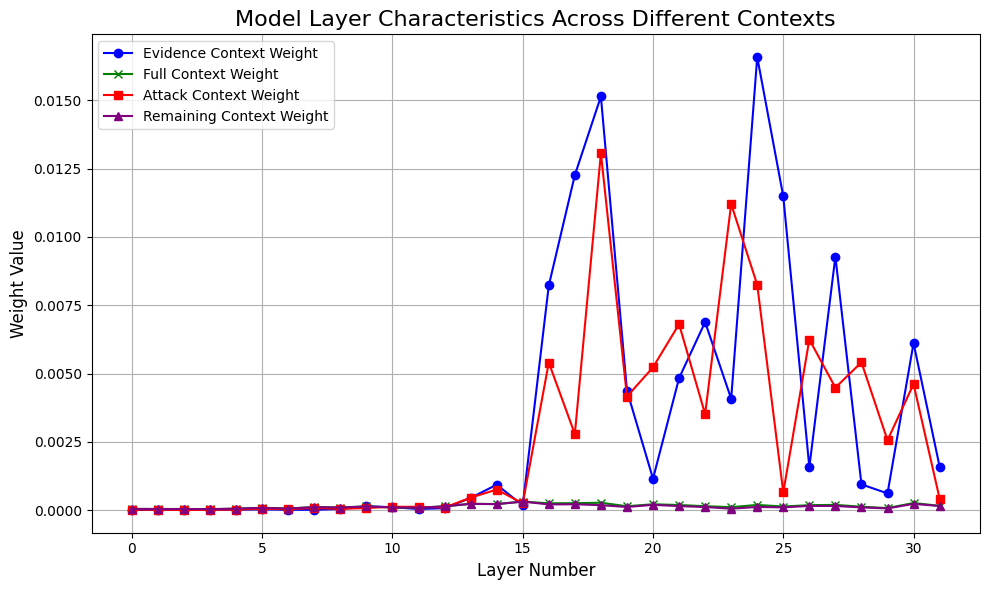

In [9]:
instance

{0: {'score': [1.1055450886487961e-05,
   5.102019581773067e-05,
   1.8402200305100642e-05,
   5.1252105900636415e-05],
  'topk_tokens': [' return',
   ',',
   ' *\n\n',
   ' before',
   ' the',
   ' was',
   'Question',
   ' bathroom',
   ' that',
   '.\n',
   ' *\n\n',
   '.\n\n',
   ':',
   'Where',
   'assistant',
   'Answer',
   '.\n\n',
   '.\n\n',
   '?\n',
   '<|begin_of_text|>']},
 1: {'score': [2.1247193217277527e-05,
   4.7412079421121765e-05,
   2.329621576901638e-05,
   4.757517551714011e-05],
  'topk_tokens': [' *\n\n',
   'Where',
   ' write',
   ' was',
   '185',
   ' not',
   ' that',
   '.\n\n',
   '\n\n',
   ' football',
   '.\n\n',
   ' bathroom',
   ':',
   'Answer',
   '<|start_header_id|>',
   '<|eot_id|>',
   'assistant',
   '?\n',
   '<|begin_of_text|>',
   '<|end_header_id|>']},
 2: {'score': [1.3730209320783616e-05,
   4.718963277821693e-05,
   8.566417928897973e-06,
   4.7429958515009235e-05],
  'topk_tokens': [' was',
   'user',
   ' write',
   ' return',
 

ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2024-12-17 19:54:18


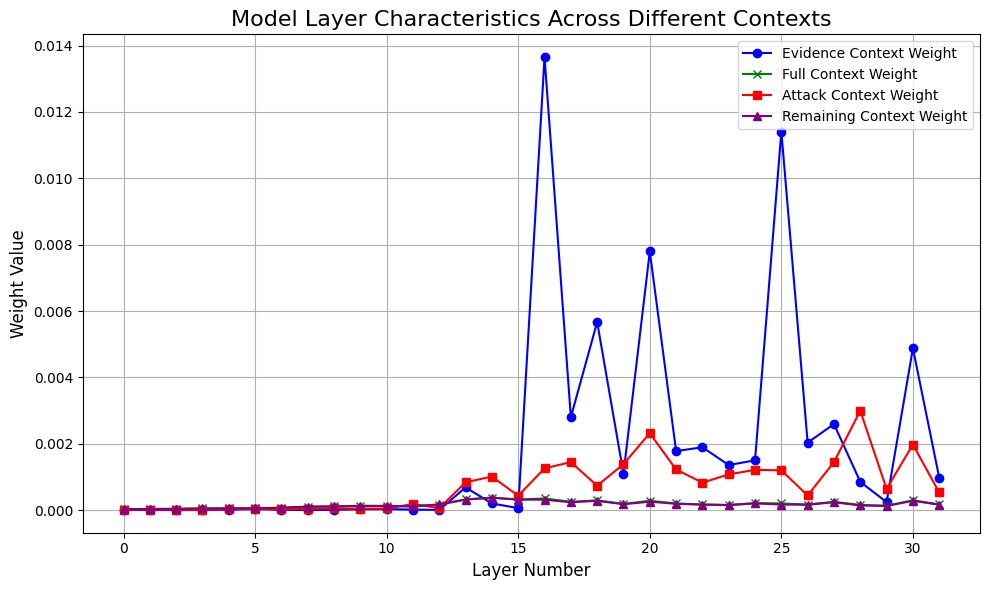

In [ ]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np

# 数据：每层的四个权重数值
layer_data = {
    0: [4.959665238857269e-06, 3.241457776316934e-05, 1.915307207541032e-05, 3.2536576766406514e-05],
    1: [6.113294512033463e-06, 3.588264777170998e-05, 1.875220826177886e-05, 3.602615563138125e-05],
    2: [3.3918768167495728e-06, 3.954556222308137e-05, 1.3849161791078972e-05, 3.973980739152632e-05],
    3: [4.411069676280022e-06, 5.2358093491322196e-05, 8.825382048433477e-06, 5.265427548364616e-05],
    4: [1.409146934747696e-05, 5.386575933844638e-05, 3.642363078666456e-05, 5.403527912603641e-05],
    5: [3.511123359203339e-05, 5.6201644940101574e-05, 3.5292892293496564e-05, 5.633910748514353e-05],
    6: [1.1113425716757775e-05, 7.276903453996061e-05, 2.8178434700803887e-05, 7.310343142066736e-05],
    7: [5.842046812176705e-06, 0.0001060344519507986, 4.455788681904475e-05, 0.0001065330393336028],
    8: [1.1762231588363648e-05, 0.0001127064162164015, 5.673789278124318e-05, 0.00011318438913503663],
    9: [2.7908291667699813e-05, 0.00013008105668458142, 4.593079740350897e-05, 0.00013067705246309438],
    10: [3.418363630771637e-05, 0.0001264135955578132, 5.119948676138213e-05, 0.00012694854421944576],
    11: [1.703500747680664e-05, 0.00011598208717596412, 0.00018443663914998373, 0.00011594746073912442],
    12: [8.40499997138977e-06, 0.00017115683509330904, 6.23587067380096e-05, 0.00017200319697982774],
    13: [0.0006855845451354981, 0.00032301160542711025, 0.0008409402587197044, 0.0003200018249680569],
    14: [0.00020253956317901612, 0.0003778427242573789, 0.0010134717731764822, 0.0003756827718102024],
    15: [6.217481568455696e-05, 0.00031942024437131556, 0.00043356729050477344, 0.0003195906271669796],
    16: [0.013655662536621094, 0.0003536513946724383, 0.001258882609280673, 0.0003170647412450094],
    17: [0.0028010547161102296, 0.00025052682229714346, 0.0014491054144772616, 0.00023932953601892812],
    18: [0.005669236183166504, 0.00029643327858037727, 0.0007366122621478456, 0.0002813514333096739],
    19: [0.0010981798171997071, 0.0001875015840294935, 0.001387981077035268, 0.0001803515607935149],
    20: [0.007794710993766785, 0.0002826679076511171, 0.0023177458029804807, 0.0002557887740868018],
    21: [0.0017806708812713623, 0.00020140549310989484, 0.001226557023597486, 0.0001933175469836189],
    22: [0.001896064169704914, 0.00017294463764580063, 0.0008285483627608328, 0.00016600876801548678],
    23: [0.0013591922819614411, 0.00015825946183714815, 0.0010787226033933234, 0.0001515341972385033],
    24: [0.0015029147267341613, 0.0002128314567774904, 0.001215286637571725, 0.00020555120376496033],
    25: [0.011409810930490493, 0.0002014303863407309, 0.0012002720031887293, 0.0001696389194466929],
    26: [0.0020347237586975098, 0.00016976514241572694, 0.0004434507114417625, 0.00016403680461855895],
    27: [0.002594304084777832, 0.00025047442936777206, 0.0014475617896426809, 0.00023979435073309436],
    28: [0.0008534610271453858, 0.00015710730061251676, 0.0029951467206983857, 0.00014380581997533933],
    29: [0.00024196654558181763, 0.0001313316633156309, 0.0006413843595620358, 0.00012897700992524328],
    30: [0.004878909885883331, 0.00029894708488866395, 0.0019776151713096733, 0.0002807725914574342],
    31: [0.0009814728051424026, 0.0001716352537038241, 0.0005350086386456634, 0.00016815008150651299],
}

